# A basic look at NZs new cases during the current outbreak. 

Total cases, updated daily from media reports, when I can be bothered. Case totals early on contain MIQ and community, but that is drowned out later on, probably not too much to worry about. But the total infection will be out by ~30-40 depending on the day due to boarder cases. 
Four models included. A 3rd order polynomial fit to the data up until 4 days ago (latest 4 days are excluded in fitting, it indicates if the real data is out passing or under passing the method), a 3rd order polynomial fitted up to todays data and exponential growth and logistic functions fitted up to todays data. See the code for how they are fitted etc. pretty straight forward use of standard libs. 

None of them will perform well or anything, don’t treat these as predictions, its just a bit of curve fitting to current data.

In [1]:
import numpy as np
import seaborn as sb
import scipy as scipy
import matplotlib.pyplot as plt

nzT = np.cumsum(np.array([0,1,9,12,16,14,24,24,38,42,62,68,70, 82, 83, 53, 49, 75, 49, 28, 20, 20, 20, 21]))
daysNZ = np.array([0,1,2,3,4,5 ,6 ,7,8,9,10,11,12, 13, 14, 15, 16,17,18, 19, 20, 21, 22, 23])
predrange = np.linspace(0,len(daysNZ)+3, len(daysNZ)+3)

def exp_fit(x,a,b):    
    y = a*np.exp(-b*x)
    return(y)

def log_fit(x,m,n,o):
    y = o/(1+np.exp(-(x-n)/m))
    return(y)

exp_popt, exp_pcov = scipy.optimize.curve_fit(exp_fit, daysNZ, nzT)
a, b = exp_popt
log_popt, log_pcov = scipy.optimize.curve_fit(log_fit, daysNZ, nzT)
m,n,o = log_popt
logold_popt, logold_pcov = scipy.optimize.curve_fit(log_fit, daysNZ[:-4], nzT[:-4])
mo,no,oo = logold_popt

predexp = exp_fit(predrange, a, b)
predlog = log_fit(predrange, m, n, o)
predlogold = log_fit(predrange, mo, no, oo)
modold = np.polyfit(daysNZ[:-4], nzT[:-4], 3)
mod = np.polyfit(daysNZ, nzT, 3)
predold = modold[3]+ predrange*modold[2] + modold[1]*predrange**2 + modold[0]*predrange**3
pred = mod[3]+ predrange*mod[2] + mod[1]*predrange**2 + mod[0]*predrange**3


<ipython-input-1-807f651ceaf4>:11: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*x)


## Last couple of days, it looks like its flattening off, so here are the logistic curves only.

Text(0, 0.5, 'Total cases')

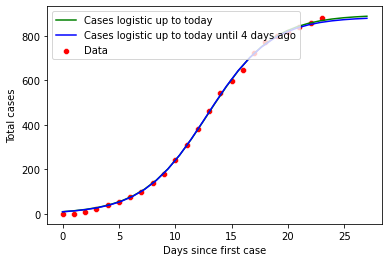

In [2]:
sb.lineplot(x=predrange, y=(predlog), color='green', label='Cases logistic up to today')
sb.lineplot(x=predrange, y=(predlogold), color='blue', label='Cases logistic up to today until 4 days ago')
sb.scatterplot(x=daysNZ, y=(nzT), color='r', label='Data')
plt.legend(loc='upper left')
plt.xlabel('Days since first case')
plt.ylabel('Total cases')

Predicted case change next three days, (logistic up to today):  [6. 4. 3.]
Predicted case change next three days, (logistic up until 4 days ago):  [5. 4. 3.]


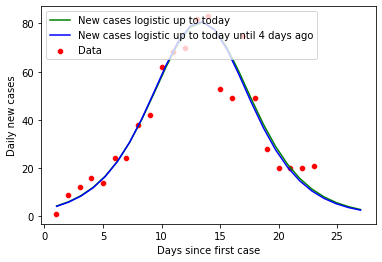

In [3]:
sb.lineplot(x=predrange[1:], y=np.diff(predlog), color='green', label='New cases logistic up to today')
sb.lineplot(x=predrange[1:], y=np.diff(predlogold), color='blue', label='New cases logistic up to today until 4 days ago')
sb.scatterplot(x=daysNZ[1:], y=np.diff(nzT), color='r', label='Data')
plt.legend(loc='upper left')
plt.xlabel('Days since first case')
plt.ylabel('Daily new cases')
print("Predicted case change next three days, (logistic up to today): ", np.diff(predlog[-4:]).round())
print("Predicted case change next three days, (logistic up until 4 days ago): ", np.diff(predlogold[-4:]).round())

Most recent cases reported:  880
Predicted cases next three days, (3rd order up to today):  [866. 844. 804. 747.]
Predicted cases next three days, (3rd order until 4 days ago):  [1006. 1019. 1021. 1011.]
Predicted cases next three days, (exp up to today):  [1169. 1301. 1449. 1614.]
Predicted cases next three days, (logistic up to today):  [875. 881. 885. 888.]


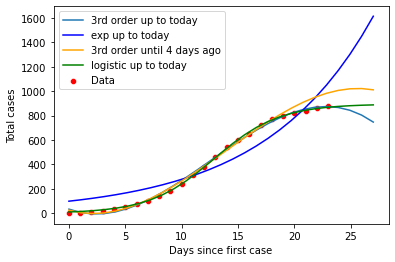

In [13]:
sb.lineplot(x=predrange, y=pred, label='3rd order up to today')
sb.lineplot(x=predrange, y=predexp, color='blue', label='exp up to today')
sb.lineplot(x=predrange, y=predold, color='orange', label='3rd order until 4 days ago')
sb.lineplot(x=predrange, y=predlog, color='green', label='logistic up to today')
sb.scatterplot(x=daysNZ, y=nzT, color='red', label='Data')
plt.xlabel('Days since first case')
plt.ylabel('Total cases')
plt.legend(loc='upper left')
print("Most recent cases reported: ",nzT[-1])
print("Predicted cases next three days, (3rd order up to today): ", pred[-4:].round())
print("Predicted cases next three days, (3rd order until 4 days ago): ", predold[-4:].round())
print("Predicted cases next three days, (exp up to today): ", predexp[-4:].round())
print("Predicted cases next three days, (logistic up to today): ", predlog[-4:].round())

Most recent new cases reported:  21
Predicted case change next three days, (3rd order up to today):  [-23. -39. -57.]
Predicted case change next three days, (3rd order until 4 days ago):  [ 13.   2. -10.]
Predicted case change next three days, (exp up to today):  [133. 148. 165.]
Predicted case change next three days, (logistic up to today):  [6. 4. 3.]


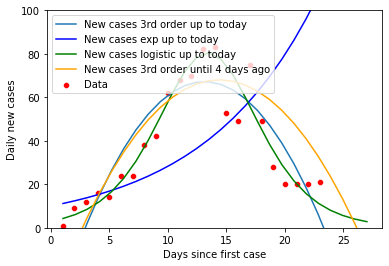

In [14]:
sb.scatterplot(x=daysNZ[1:], y=np.diff(nzT), color='r', label='Data')
sb.lineplot(x=predrange[1:], y=np.diff(pred), label='New cases 3rd order up to today')
sb.lineplot(x=predrange[1:], y=np.diff(predexp), color='blue', label='New cases exp up to today')
sb.lineplot(x=predrange[1:], y=np.diff(predlog), color='green', label='New cases logistic up to today')
sb.lineplot(x=predrange[1:], y=np.diff(predold), color='orange', label='New cases 3rd order until 4 days ago')
plt.xlabel('Days since first case')
plt.ylabel('Daily new cases')
plt.legend(loc='upper left')
plt.ylim([0,100])
print("Most recent new cases reported: ",np.diff(nzT)[-1])
print("Predicted case change next three days, (3rd order up to today): ", np.diff(pred[-4:]).round())
print("Predicted case change next three days, (3rd order until 4 days ago): ", np.diff(predold[-4:]).round())
print("Predicted case change next three days, (exp up to today): ", np.diff(predexp[-4:]).round())
print("Predicted case change next three days, (logistic up to today): ", np.diff(predlog[-4:]).round())